![alt text](Piazza_logo.svg "The piazza logo")

# An Introduction to Data Science Through Piazza Forum Data
*A comprehensive guide to the data science pipeline by Elan Naideck and Erika Schlunk*

Welcome aspiring data scientists! Have you ever wanted to do a "machine learning" or a "big data?" If so, this tutorial will show you how to get started with the data science pipeline, and will introduce you to industry standard tools for data analytics and visualization. This tutorial assumes you already know a thing or two about python, so if at any point you feel like you don't understand the code it may be wise to brush up on your python knowledge.

Now for the actual project. In this tutorial we will be using data from our own data science class forums to analyze student and instructor participation. A professor might find like to know how well their teacher's assistants have been performing, or how much their students are participating in the discussions. On our journey of meta analysis we'll walk you through all 5 steps of the data lifecycle shown bellow.

![alt text](Data_lifecycle.png "The data lifecycle")

As you can see from the many interconnecting arrows this is not a strictly linear process. As you go through this process yourself you will find out that the universe is conspiring to make our lives miserable and no step in this process is straight forward. At any point you may find yourself having to backtrack and wrangle more data, or collect more data, or wrangle more data. Or wrangle your data some more, and then wrangle it again for good measure. This tutorial can't show you exactly how to do it because the process it totally unique for every dataset you may find yourself working with. This tutorial will give you the tools and outline the process, but you'll have to use your brain to figure out how best to prepare and process your own data. Copying this code won't help you much.

## Your Environment And You

Before we get going on the real data science we have to talk about your programming environment. If you aren't familiar with the world of jupyter notebooks you're about be. If you are already familiar with jupyter notebooks, and have jupyter installed on your machine you can skip this part and move on to the required packages. These "notebooks" are industry standard for data science with python due to their publishability, modular design, and inline data visualization support. You can get basic instructions on how to install jupyter [here](https://jupyter.readthedocs.io/en/latest/install.html), but if you like spoilers and would like to see a much more comprehnsive guide on how to use jupyter you can go [here](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook). Don't worry about mastering notebooks. Just get it up and running so you can experiment with them and write your own code.

## The Packages

Python wasn't designed as a data science language, but through the magic of packages python can rival or even surpass other statistical languages like R (fight me stat majors). The beating heart of the python science ecosystem is the pandas package. Pandas is a data analysis library that has become ubiquitous in the data science world because of it's fast, well optimized data structures and intuitive design. It's the first thing you want to have installed when you begin any data science project, so if you don't already have it installed in your python envoronment do so now by using pip or conda, depending on your setup. More help for installing pandas can be found [here](https://pandas.pydata.org/pandas-docs/stable/install.html)

Once you have pandas up and running you can import it using the usual python import statements. You'll be using it a lot so I strongly recommend importing it with an alias. Industry standard is to import it as pd. The full list of standard packages you want to install when starting any project are [pandas](https://pandas.pydata.org/), [numpy](https://numpy.org/), [matplotlib](https://matplotlib.org/), [scikit-learn](https://scikit-learn.org/stable/), and [seaborn](https://seaborn.pydata.org/). If you want more information on how to use each package and what they do just follow the links to their websites. For now we'll just import them and explain how to use them as we go.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The primary data structure around which all of your work will around is the pandas dataframe. Dataframes store data like a giant excel spreadsheet, with named columns and indexed rows. If you already know a thing or two about pandas you can move on to data collection, otherwise [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) is a handy guide to all of the basic dataframe opperations that we will need as we proceed. You might want to keep this handy when writing your own code.

## Data Collection

Pictured below is the average state of real world data. Reality is messy, and so is the data it produces. Data can be downloaded from government websites, retrieved by API calls, scrapped of of websites manuallty, computer generated, or beamed into your brain by hyperinteligent beings from another world.

![alt text](dumpster-fire.gif "The average state of real world data")

For our particular situation we're going to be pulling our data with an unnoficial API for the piazza forums that somebody was kind enough to post online. API stands for application programming interface, and it's one of the nicest ways you can get data. An API is a package or set of instructions released publicly but companies or other organizations that you can use to query data from their web servers. They send you the data, usually in some documented format that you can then parse into your pandas dataframes. Pandas also has functions for importing any csv files you may stumble across online if your data is in a file you can download. A good source of getting nice, clean data like that is [kaggle](https://www.kaggle.com/datasets) If collecting your data is more complicated than either of those methods may god, and [beautifulsoup4](https://pypi.org/project/beautifulsoup4/) help you.

Thankfully we have an API, so the first step is to install it. The Piazza API which can be found [here](https://pypi.org/project/piazza-api/), with full documentation [here](https://github.com/hfaran/piazza-api/) can be installed using the standard pip/conda methods, which saves us quite a bit of hastle. Once we have it installed in our python environment we can import it into our jupyter notebook.

In [4]:
import sys
!{sys.executable} -m pip install piazza-api

 # ERIKA COULDN"T FIGURE OUT HOW TO INSTALL ON HER COMPUTER SO SHE'S USING THE ABOVE
    # AS A SHORTCUT

from piazza_api.rpc import PiazzaRPC

As you can see I didn't just import the api. Before I even wrote my import statement I read through the API documentation and figured out which part of the package I need for my particular application. For this project I'm going to need to be able to download class and post data. The PiazzaRPC class in the documentation seems to have the functions I need so I imported just that. When it comes to using API's *DOCUMENTATION IS YOUR FRIEND*

Now that we've got our API and we've read its documentation we can start collecting our data. The first step is to login to the API. Many APIs have access tied to online accounts, so you need to login with your credentials. Obviously I removed my own credentials from the code bellow before posting it online, but if you have a Piazza account you can fill in your own credentials and class id and the code should work just fine. Once you've logged in you should print out your data so you can perform a visual inspection to see how it's stuctured and if there is anything wrong with it. From there it's time to play data detective.

In [5]:
# Below is the class id. Needed for querying any data for the target class. Don't ask how I got it
# class nid: jzlv5mrrqnn4tz
nid = 'jzlv5mrrqnn4tz'

# Create a piazza API instance and login to it
# DON'T FORGET TO REMOVE THE PASSWORD BEFORE POSTING IT ONLINE
p = PiazzaRPC()
p.user_login(email='enaideck@umd.edu', password='chaseand1')

# The returned data structure is a dictionary containing tons of data about the class
# It has to be sifted through to get a post list
class_data = p.get_my_feed(limit=2000, offset=0, sort="recent", nid='jzlv5mrrqnn4tz')
posts_dict = class_data['feed']
posts_dict[5]

{'fol': 'project3|',
 'pin': 1,
 'm': 1574114977824,
 'rq': 0,
 'id': 'k34o5uf2wb63ee',
 'unique_views': 278,
 'score': 278.0,
 'is_new': False,
 'version': 8,
 'bucket_name': 'Pinned',
 'bucket_order': 0,
 'folders': ['project3'],
 'nr': 423,
 'main_version': 8,
 'request_instructor': 0,
 'log': [{'t': '2019-11-18T16:54:37Z', 'u': 'iv9hhjrk2iv2w7', 'n': 'create'},
  {'t': '2019-11-18T16:54:59Z', 'u': 'jl3b2jmi38z3wh', 'n': 'followup'},
  {'t': '2019-11-18T16:55:33Z', 'n': 'followup'},
  {'t': '2019-11-18T16:56:31Z', 'u': 'iv9hhjrk2iv2w7', 'n': 'update'},
  {'t': '2019-11-18T16:59:32Z', 'n': 'followup'},
  {'t': '2019-11-18T17:00:49Z', 'n': 'followup'},
  {'t': '2019-11-18T18:46:07Z', 'n': 'followup'},
  {'t': '2019-11-18T22:09:37Z', 'u': 'iv9hhjrk2iv2w7', 'n': 'feedback'}],
 'subject': 'Extension on Project 3',
 'no_answer_followup': 0,
 'num_favorites': 1,
 'type': 'note',
 'tags': ['instructor-note', 'pin', 'project3'],
 'content_snipet': 'I&#39;m extending P3&#39;s due date to next

As predicted the data format the API is giving us is... difficult. How are we supposed to pull TA participation data from this? Who even are the TA's? To pull the information we want out from this tangled mess we're going to have to put out the dumpster fire. That's right it's time for...

## Data Processing

Also known as data wrangling, programmer's torture, or the universe's punishment for the inevitable ethical transgressions of your data science career. Whatever you call it, and whoever you pray too, data wrangling is an essential and massive part of the data science process. It's usually the most scary and time consuming step of any project. Data wrangling can look complicated, and very frightening so once you see your data for the first time and start to panic you need to close your eyes, take a deep breath, and stay focused on a specific goal.

![alt text](panic.png "don't panic!")

The ultimate goal of the data wrangling process is to end up with a few nice beautiful pandas dataframes. Picture them in you mind, their golden radiance and easy data access flowing through you. If you plan ahead and stay focused data wrangling can become much more managable. With that being said, what does a good dataframe look like?

### Tidy Data and You

When it comes to planning out your dataframes there are a few easy rules to follow that will make sure your dataframe is easy to work with, and easy to understand if you end up giving your data to somebody else. If you follow these rules you can claim that your data is 'tidy'
* Each variable must have its own column
* Each observation must have its own row
* Each value must have its own cell

You will come across data that doesn't follow these rules way too often, and it's up to you to rid the world that filth one dataframe at a time. Tidy data examples and more information can be found [here](https://www.jeannicholashould.com/tidy-data-in-python.html)

Now that we have a good idea what our dataframe should look like we need to come up with a schema to organize our data into. There is no deterministic procedure to figuring this out. You have to consider the analysis you're trying to make with your data and the avaliable data to create a good schema. The goal of this example is to analyze the responsiveness of the class instructors and look for greater trends in post data. The challenge of getting the Piazza posts data into a neat dataframe is that the posts have a nested structure. A root post is made by a user, then followup sub-posts are made by students and instructors. Our dataframe is going to have to reflect the nested nature of this information. So the plan is to have each post or followup as each row in a dataframe. The varaibles are going to be:
* date posted
* poster (instructor name or just student)
* type (note, question, followup, or feedback)
* id (id of this post in case it needs to be accessed later)
* root (post id of root post. Refers to itself if post is a root)
* unique views
* number of favorites
* folder(s) posts can have more than one folder. This will be tricky to make work

### Pre-Wrangling
We want to know the folders the posts are in for our analysis later, but a single post can occupy more than one folder. Since putting lists inside a pandas dataframe in bad practice I'll one hot encode the folders instead. Each folder will have its own column of true or false values to represent wheather a post is in that folder. So before we start we need a list of the folders.

In [6]:
folders = class_data['tags']['instructor']
folders

['quiz1',
 'quiz2',
 'quiz3',
 'quiz4',
 'quiz5',
 'quiz6',
 'quiz7',
 'quiz8',
 'quiz9',
 'quiz10',
 'quiz11',
 'quiz12',
 'project1',
 'project2',
 'project3',
 'project4',
 'midterm_exam',
 'final_tutorial',
 'other',
 'project',
 'exam',
 'logistics']

Looking under 'tags' and then 'instructor' for a list of folders may seem unintuitive. That's because it is. The only way to figure out how to parse your data out is to carefully scrutinize it visually. Next up we need a dictionary relating user ids to the instuctors and ta's.

In [7]:
staff = {}
for i in range(len(posts_dict)):
    for j in range(len(posts_dict[i]['log'])):
        # We're not sure if the user tag is in the post log. We have to check. We also don't need duplicates.
        if 'u' in posts_dict[i]['log'][j].keys() and not posts_dict[i]['log'][j]['u'] in staff.keys():
            udata = p.get_users(user_ids=[posts_dict[i]['log'][j]['u']], nid=nid)[0]
            if udata['role'] == 'ta' or udata['role'] == 'professor': # We're not interested in students
                staff[udata['id']] = ''.join([x[0].upper() for x in udata['name'].split(' ')]) #
                
staff

{'jzm53injueh49j': 'AP',
 'iv9hhjrk2iv2w7': 'JD',
 'jzshkyeh9xl2kq': 'NB',
 'jzlv84yxs2i5yl': 'MD',
 'jxkizzz9dmw5cl': 'VN',
 'it1xxqm338f2wo': 'YZ',
 'idx3g94pfq357h': 'CS',
 'hcjqqmhat2i461': 'BB',
 'jrgrxaenjy9t5': 'SD',
 'i0var34o4c12tl': 'SH',
 'jrhvjhc017y2ld': 'HW',
 'iyd84opsi10ph': 'VSH',
 'if99odwpfz81nq': 'AM',
 'j6wht3l0itp543': 'WL'}

As you can see I've taken the class staff's names and converted them into initials to preserve their anonymitiy. It's easy to get careless as a data scientist and accidently leak huge amounts of user information. An ethical data scientist is a careful data scientist. We'd love to build our dataframe now but we imediatly run into another problem though. The post overview we collected in the first stage of the pipeline doesn't contain enough information about the child posts. We're going to have to use the API to collect more information.

In [8]:
import time

# We have a unique problem we need to solve. To get follow up post information we have to go through the post dictionary
# we created earlier and request the post with the API. The API limits how quickly we can do this so we have to run it in
# batches. This is going to take forever.
wait = 10
batch = 10
posts_list = []
for i in range(0, len(posts_dict)):
    posts_list += [p.content_get(cid=posts_dict[i]['id'], nid=nid)]
    if (i % batch == 0): # Every batch wait for the designated time and print out how many posts we've processed
        print(str(i) + "/" + str(len(posts_dict)))
        time.sleep(wait)

0/507
10/507
20/507
30/507
40/507
50/507
60/507
70/507
80/507
90/507
100/507
110/507
120/507
130/507
140/507
150/507
160/507
170/507
180/507
190/507
200/507
210/507
220/507
230/507
240/507
250/507
260/507
270/507
280/507
290/507
300/507
310/507
320/507
330/507
340/507
350/507
360/507
370/507
380/507
390/507
400/507
410/507
420/507
430/507
440/507
450/507
460/507
470/507
480/507
490/507
500/507


Now we visually inspect the information to get an idea of what we're working with.

In [13]:
print(posts_list[0].keys())
print(posts_list[0]['children'][0].keys())
posts_list[8]['change_log']

dict_keys(['folders', 'nr', 'data', 'created', 'bucket_order', 'no_answer_followup', 'change_log', 'bucket_name', 'history', 'type', 'tags', 'tag_good', 'unique_views', 'children', 'tag_good_arr', 'id', 'config', 'status', 'request_instructor', 'request_instructor_me', 'bookmarked', 'num_favorites', 'my_favorite', 'is_bookmarked', 'is_tag_good', 'q_edits', 'i_edits', 's_edits', 't', 'default_anonymity'])
dict_keys(['anon', 'folders', 'data', 'no_upvotes', 'subject', 'created', 'bucket_order', 'bucket_name', 'type', 'tag_good', 'children', 'tag_good_arr', 'no_answer', 'id', 'updated', 'config'])


[{'anon': 'full',
  'data': 'k46n99vmhxt3eg',
  'type': 'create',
  'when': '2019-12-15T06:44:32Z'},
 {'anon': 'full',
  'data': 'k477xgt73lj4r2',
  'to': 'k46n99vkqo93ef',
  'type': 's_answer',
  'when': '2019-12-15T16:23:13Z'},
 {'anon': 'full',
  'to': 'k46n99vkqo93ef',
  'type': 'followup',
  'when': '2019-12-15T16:37:21Z'}]

Now that we've downloaded the full posts list along with their children posts we have to cram them into a dataframe. This is made slightly more complicated by the tree-like structure of the posts. A post can have an arbitrary number of child posts, and each of those can have their own child posts to infititum. To handle this structure wer're going to need a recursive function to flatten the posts out so we can process them.

In [14]:
# This function takes a root post, which has a tree-like structure and flattens it with its children into a list of posts
def flatten_post(p, root = None, folders = None, views = None, favs = None):
    # Since root posts contain more information than children posts we need to treat them differently
    if root == None:
        # Make a new dictionary that only stores the data we need
        p_data = {'created':p['created'], 'folders':p['folders'], 'id':p['id'], 'type':p['type'], 
                  'views':p['unique_views'], 'num_favorites':p['num_favorites'], 'root':p['id']}
        # Save the uid to the flattened post data
        if 'uid' in p['change_log'][0].keys():
            p_data['uid'] = p['change_log'][0]['uid']
        else:
            p_data['uid'] = 'anon'
        # Recurse on the children
        p_list = [p_data]
        for child in p['children']:
            p_list += flatten_post(child, root = p['id'], folders = p['folders'],
                                   views = p['unique_views'], favs = p['num_favorites'])
        return p_list
    else:
        p_data = {'created':p['created'], 'folders':folders, 'id':p['id'], 'type':p['type'],
                  'views':views, 'num_favorites':favs, 'root':root}
        # Save the uid to the flattened post data
        if 'uid' in p.keys():
            p_data['uid'] = p['uid']
        else:
            p_data['uid'] = 'anon'
        # Recurse on the children
        p_list = [p_data]
        for child in p['children']:
            p_list += flatten_post(child, root = root, folders = folders,
                                   views = views, favs = favs)
        return p_list

### Oh yeah, it's all coming together

Now that we're done prewrangling we can get down to the actual data wrangling. That beautiful dataframe is so close I can almost taste it!

In [20]:
from datetime import datetime

# We initialize the dataframe with a column for each variable we want to store
posts = pd.DataFrame(columns = ['timestamp', 'poster', 'type', 'id', 'root', 'unique_views', 'num_favs'] + folders)

# Now here's where all that hard work pays off
i = 0 # We need to keep track of our dataframe index. j will be our root post list index
for j in range(len(posts_list)):
    new_posts = flatten_post(posts_list[j]) # Flatten each post
    for post in new_posts: # Go through each post in our list and add it to the dataframe
        posts.loc[i, 'timestamp'] = datetime.strptime(post['created'], '%Y-%m-%dT%H:%M:%SZ') # Must parse timestamps
        if post['uid'] in staff.keys(): # Need to handle the cases when poster isn't a staffmember
            posts.loc[i, 'poster'] = staff[post['uid']]
        else:
            posts.loc[i, 'poster'] = 'student'
        posts.loc[i, 'type'] = post['type']
        posts.loc[i, 'id'] = post['id']
        posts.loc[i, 'root'] = post['root']
        posts.loc[i, 'unique_views'] = post['views']
        posts.loc[i, 'num_favs'] = post['num_favorites']
        for folder in folders:
            posts.loc[i, folder] = 0
        for folder in post['folders']:
            if folder in folders: posts.loc[i, folder] = 1
        i += 1 # Move the dataframe pointer to the next empty slot
        

In [21]:
posts.head()

,timestamp,poster,type,id,root,unique_views,num_favs,quiz1,quiz2,quiz3,...,project1,project2,project3,project4,midterm_exam,final_tutorial,other,project,exam,logistics
0,2019-12-09 18:08:02,AP,poll,k3yr15r88u7667,k3yr15r88u7667,148,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2019-12-09 18:08:59,student,followup,k3yr2dr1iiy10r,k3yr15r88u7667,148,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2019-12-11 15:40:35,student,followup,k41gn8dijq91l8,k3yr15r88u7667,148,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2019-12-11 16:42:36,AP,feedback,k41iuzyny955xq,k3yr15r88u7667,148,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2019-12-12 20:53:43,student,followup,k4379sa041gq,k3yr15r88u7667,148,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


There we go! One beautiful dataframe ready for visualization and analysis. Just reading my code and instructions it might seem like this process is easy, or at least doesn't take very long. This took me over 6 hours. This forum data is particuarly nasty to wrangle, and figuring out how to parse the information I needed from an API I've never used before with cryptic and many times unhelpful field names was a grueling endevour. For every functioning block of code you see here there were a hundred I deleted. I had to write countless little test blocks to probe the data and see what information was hidden where. The process was made even more difficult by the fact that posts didn't always have the same information fields stored in them so it was easy to run into key errors. What I'm trying to say is that I wasn't joking when I said wrangling is the hardest, most time consuming part of the process. It's a lot of trial and error but pushing through is very rewarding.

## Exploratory Data Analysis and Visualization

Now we get to do the fun part: play around with that data! We'll start by trying a few things to see if we can find any intresting patterns or trends that reveal any truths about the data.

The most obvious place to start, is to see who posts the most. We'll use ______________ to make a bar graph illustrating who repiles the most. But first, to get this bar graph, we'll get get a table containing the counts using a great command, groupby.

In [82]:
# Visualization of who replies 
poster_counts = posts.groupby("poster").count()[["id"]]
labels = posts.groupby("poster").groups.keys()
poster_counts

,id
poster,
AP,11
BB,5
CS,36
HW,4
JD,55
MD,11
NB,2
SD,2
SH,2


<function matplotlib.pyplot.show(*args, **kw)>

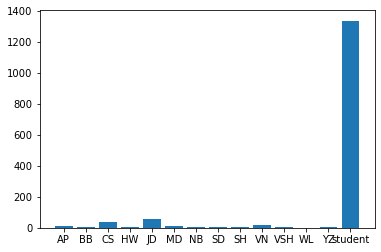

In [83]:
plt.bar(range(len(poster_counts.id)), poster_counts.id)
plt.xticks(range(len(poster_counts)), labels)
plt.show

We probably want to remove students here, as that is so much larger that it's hard to compare each individual instructor. By let's leave this here to show the compairson between students and instructors.

In [ ]:
# remove students


## Analysis, Hypothesis Testing and ML

## Insight and Policy Decision

In [12]:
#Erika was here